### Import libraries

In [1]:
import pandas as pd
import numpy as np

# Pandas warning messages (optional)
pd.options.mode.chained_assignment = None  #default='warn'

# Plot options
import matplotlib.pyplot as plt
import seaborn as sns
sns.palplot(sns.color_palette('deep'))
sns.set_style("whitegrid")
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn import preprocessing
from sklearn.svm import SVC

In [2]:
data=pd.read_csv('data/listings.csv', low_memory=False, 
                 usecols=['id','name','host_id','host_name','neighbourhood','latitude','longitude',
                          'room_type','price','minimum_nights','number_of_reviews','last_review','reviews_per_month',
                          'calculated_host_listings_count','availability_365'])
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11668 entries, 0 to 11667
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              11668 non-null  int64  
 1   name                            11668 non-null  object 
 2   host_id                         11668 non-null  int64  
 3   host_name                       11666 non-null  object 
 4   neighbourhood                   10819 non-null  object 
 5   latitude                        11668 non-null  float64
 6   longitude                       11668 non-null  float64
 7   room_type                       11668 non-null  object 
 8   price                           11668 non-null  object 
 9   minimum_nights                  11668 non-null  int64  
 10  availability_365                11668 non-null  int64  
 11  number_of_reviews               11668 non-null  int64  
 12  last_review                     

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,number_of_reviews,last_review,calculated_host_listings_count,reviews_per_month
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,East Downtown,30.27750,-97.71398,Entire home/apt,$225.00,30,0,24,2019-03-16,3,0.18
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,East Downtown,30.27577,-97.71379,Private room,$100.00,30,0,9,2018-03-14,3,0.07
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,East Downtown,30.26112,-97.73448,Entire home/apt,$95.00,2,334,529,2020-03-01,1,3.94
3,5769,NW Austin Room,8186,Elizabeth,SW Williamson Co.,30.45697,-97.78422,Private room,$40.00,1,14,257,2019-11-03,1,2.12
4,6413,Gem of a Studio near Downtown,13879,Todd,Travis Heights,30.24829,-97.73726,Entire home/apt,$99.00,3,0,112,2020-03-08,1,0.90


In [3]:
len(data[data['room_type'] == 'Entire home/apt'])

8848

In [4]:
len(data[data['room_type'] == 'Private room'])

2610

In [5]:
# Convert 'price' from string currency to float
data['price'] = data['price'].str.replace('$', '').str.replace(',', '').astype(float, 2)

In [6]:
# Fill missing data with mean strategy
data[data==' ']=np.nan
#print the number of NaNs
print(data.isnull().sum())

id                                   0
name                                 0
host_id                              0
host_name                            2
neighbourhood                      849
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
availability_365                     0
number_of_reviews                    0
last_review                       2522
calculated_host_listings_count       0
reviews_per_month                 2522
dtype: int64


C:\Users\rtalebiz\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights', 'availability_365',
       'number_of_reviews', 'last_review', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

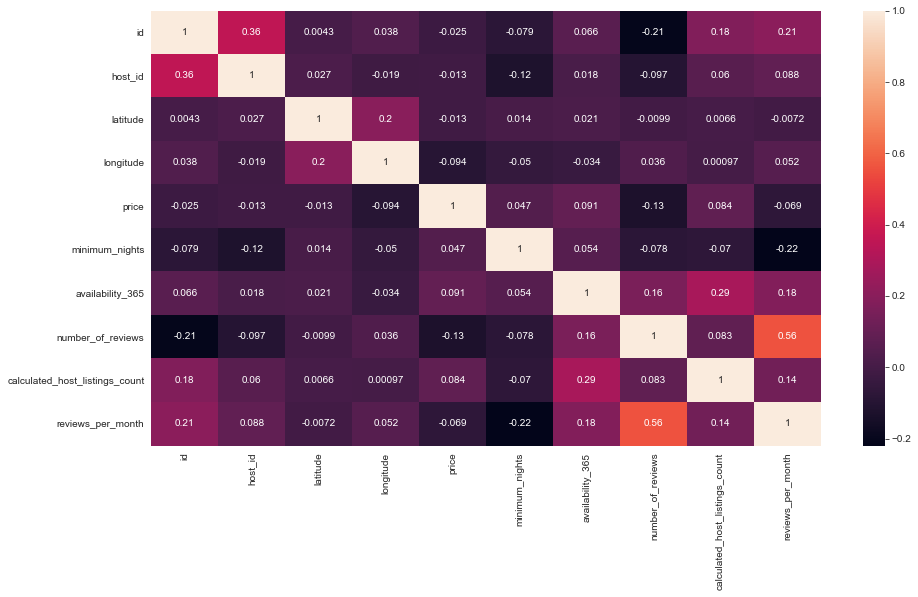

In [7]:
corr=data.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
data.columns

Text(0.5, 1.0, 'Room Type')

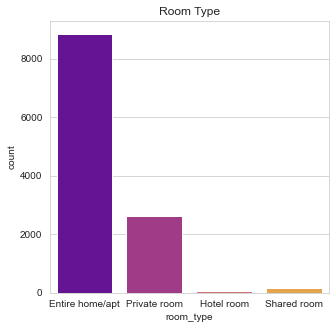

In [8]:
sns.countplot(data['room_type'],palette='plasma')
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.title('Room Type')

In [9]:
data.drop(['id','name','host_id','latitude','longitude',
           'latitude','longitude','number_of_reviews'], axis=1, inplace=True)
#examing the changes
data.head(5)

,host_name,neighbourhood,room_type,price,minimum_nights,availability_365,last_review,calculated_host_listings_count,reviews_per_month
0,Paddy,East Downtown,Entire home/apt,225.0,30,0,2019-03-16,3,0.18
1,Paddy,East Downtown,Private room,100.0,30,0,2018-03-14,3,0.07
2,Sylvia,East Downtown,Entire home/apt,95.0,2,334,2020-03-01,1,3.94
3,Elizabeth,SW Williamson Co.,Private room,40.0,1,14,2019-11-03,1,2.12
4,Todd,Travis Heights,Entire home/apt,99.0,3,0,2020-03-08,1,0.90


In [10]:
data.drop(['last_review','reviews_per_month','host_name'], axis=1, inplace=True)
data.head(20)

,neighbourhood,room_type,price,minimum_nights,availability_365,calculated_host_listings_count
0,East Downtown,Entire home/apt,225.0,30,0,3
1,East Downtown,Private room,100.0,30,0,3
2,East Downtown,Entire home/apt,95.0,2,334,1
3,SW Williamson Co.,Private room,40.0,1,14,1
4,Travis Heights,Entire home/apt,99.0,3,0,1
5,Zilker,Entire home/apt,139.0,3,127,2
6,East Riverside,Entire home/apt,40.0,3,180,1
7,NaN,Entire home/apt,300.0,1,289,1
8,Travis Heights,Entire home/apt,550.0,1,139,11
9,University of Texas,Entire home/apt,220.0,30,358,1


In [11]:
from numpy.random import seed

In [12]:
def Encode(data): 
    for column in data.columns[data.columns.isin(['neighbourhood','room_type'])]: 
        data[column]=data[column].factorize()[0] 
    return data 
data_en=Encode(data.copy())
data_en.head()

,neighbourhood,room_type,price,minimum_nights,availability_365,calculated_host_listings_count
0,0,0,225.0,30,0,3
1,0,1,100.0,30,0,3
2,0,0,95.0,2,334,1
3,1,1,40.0,1,14,1
4,2,0,99.0,3,0,1


In [13]:
np.random.seed(42)
N_rep=10000
mean_replicate=np.empty(N_rep)
for i in range(N_rep):
    samples=np.random.choice(data_en['price'], len(data_en['price']))
    mean_replicate[i]=np.mean(samples)
mean, std=np.mean(mean_replicate), np.std(mean_replicate)
lower_bound=mean-1.64*std
print(lower_bound)

461.7620383432878


In [14]:
entire_home=data_en.price[data_en.room_type==0]
private_room=data_en.price[data_en.room_type==1]
private_number=len(private_room)
entire_number=len(entire_home)

In [15]:
print(entire_number)
print(private_number)

8848
2610


In [16]:
mean_diff_observe=np.mean(entire_home)-np.mean(private_room)
print(mean_diff_observe)

478.8538166947268


#### The mean price difference between private room and entire home is $-478.85

In [17]:
np.random.seed(42)
std_diff_replicate=np.empty(N_rep)
for i in range(N_rep):
    entire_samples=np.random.choice(entire_home, entire_number)
    private_samples=np.random.choice(private_room, private_number)    
    std_diff_replicate[i]=np.std(entire_samples)-np.std(private_samples)
std_diff_mean, std_diff_std=np.mean(std_diff_replicate), np.std(std_diff_replicate)
conf_interval=[std_diff_mean-1.96*std_diff_std,std_diff_mean+1.96*std_diff_std]
print(conf_interval)

[976.6862013621104, 1386.400675902699]


In [18]:
np.random.seed(42)
np.random.choice(entire_home, entire_number)

array([ 88., 250., 204., ..., 136., 555., 100.])

#### 95% confidence interval for the difference between the private room and entire home/apt is [-1381,-981].

In [19]:
np.random.seed(42)
entire_shifted=entire_home-np.mean(entire_home)+np.mean(private_room)
def permutation_sample(data1, data2):
    data3=np.random.permutation(np.concatenate((data1,data2)))
    perm_sample_1=data3[:len(data1)]
    perm_sample_2=data3[len(data1):]
    return perm_sample_1, perm_sample_2
perm_mean_replicates=np.empty(N_rep)
for i in range(N_rep):
    perm_private, perm_entire=permutation_sample(private_room, entire_shifted)
    perm_mean_replicates[i]=np.mean(perm_private)-np.mean(perm_entire)
mean_diff=np.empty(N_rep)
for i in range(N_rep):
    mean_diff[i]=np.mean(private_samples)-np.mean(np.random.choice(entire_shifted, len(entire_shifted)))

In [20]:
p_value_permutation=np.sum(perm_mean_replicates>=mean_diff_observe)/len(perm_mean_replicates)
print('p_val_permuation is %s' % p_value_permutation)

p_val_permuation is 0.0


In [21]:
p_val=(np.sum(mean_diff)>=mean_diff_observe)/len(mean_diff)
print('p value is %s'% p_val)

p value is 0.0001


#### Based on the p value 0.0001, we can predict the price between entire home/apt and private room has signifant difference